In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# read the file
insurance = pd.read_csv("insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [132]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [133]:
# regression algorithms works on features represented as numbers only
# converting string values to numbers
insurance['sex'] = insurance['sex'].apply({'male':0, 'female':1}.get) 
insurance['smoker'] = insurance['smoker'].apply({'yes':1, 'no':0}.get)
insurance['region'] = insurance['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [134]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Text(0, 0.5, 'predicted_charges')

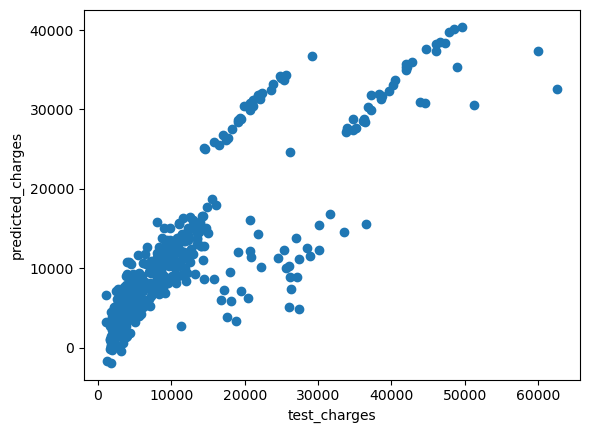

In [135]:
# determine the features
X = insurance[['age','sex','bmi','children','smoker','region']]

# determine the predicted variable
y = insurance['charges']

# X.head()
# y.head()

# splitting train and test data
# 30 % will be used in testing and the rest for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# len(X_test)
# len(X_train)

model = LinearRegression()

# fitting the linear model by passing the training dataset
model.fit(X_train, y_train)

# predicting the target variable "charges" for test dataset
predictions = model.predict(X_test)

# predictions[0:10]

# compare the prediction values with actual results by plotting
plt.scatter(y_test, predictions)
plt.xlabel('test_charges')
plt.ylabel('predicted_charges')



In [136]:
accuracy = mean_squared_error(y_test, predictions, squared=False)

# here is the data of a new patient to predict its charges
data = {'age': 24, 'sex': 1, 'bmi': 23.50, 'children' : 0, 'smoker' : 0, 'region' : 3}  
index = [1]
new_patient = pd.DataFrame(data, index)
new_patient

,age,sex,bmi,children,smoker,region
1,24,1,23.5,0,0,3


In [140]:
# calculate the mean square error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# make prediction for a new patient charges
new_patient_prediction = model.predict(new_patient)
print("The new patient charges will be : ",new_patient_prediction)

Mean Squared Error: 38956727.50108157
The new patient charges will be :  [1911.85416013]
